In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:/r datasets/ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
df.shape

(2111, 17)

In [4]:
df.describe()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
df.tail()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [7]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
df.isnull().sum().sum()


0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

# Convert categorical code into order

In [10]:
from pandas.api.types import CategoricalDtype

In [11]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [12]:
df['NObeyesdad']=df['NObeyesdad'].astype(CategoricalDtype(categories=['Insufficient_Weight'
,'Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I'
,'Obesity_Type_II','Obesity_Type_III'],ordered=True)).cat.codes

In [13]:
df['NObeyesdad'].unique()


array([1, 2, 3, 4, 0, 5, 6], dtype=int8)

In [14]:
df['CAEC'].unique()


array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [15]:
df['CAEC']=df['CAEC'].astype(CategoricalDtype(categories=['no','Sometimes'
,'Frequently','Always'])).cat.codes


In [16]:
df['CAEC'].unique()


array([1, 2, 3, 0], dtype=int8)

In [17]:
 df['CALC'].unique()


array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [18]:
df['CALC']=df['CALC'].astype(CategoricalDtype(categories=['no','Sometimes'
,'Frequently','Always'])).cat.codes

In [19]:
df['CALC'].unique()

array([0, 1, 2, 3], dtype=int8)

In [20]:
df['CALC']

0       0
1       1
2       2
3       2
4       1
       ..
2106    1
2107    1
2108    1
2109    1
2110    1
Name: CALC, Length: 2111, dtype: int8

In [21]:
df['CAEC'].unique()

array([1, 2, 3, 0], dtype=int8)

In [22]:
df['NObeyesdad'].unique()

array([1, 2, 3, 4, 0, 5, 6], dtype=int8)

In [23]:
df['NObeyesdad']

0       1
1       1
2       1
3       2
4       3
       ..
2106    6
2107    6
2108    6
2109    6
2110    6
Name: NObeyesdad, Length: 2111, dtype: int8

In [24]:
df['CAEC']

0       1
1       1
2       1
3       1
4       1
       ..
2106    1
2107    1
2108    1
2109    1
2110    1
Name: CAEC, Length: 2111, dtype: int8

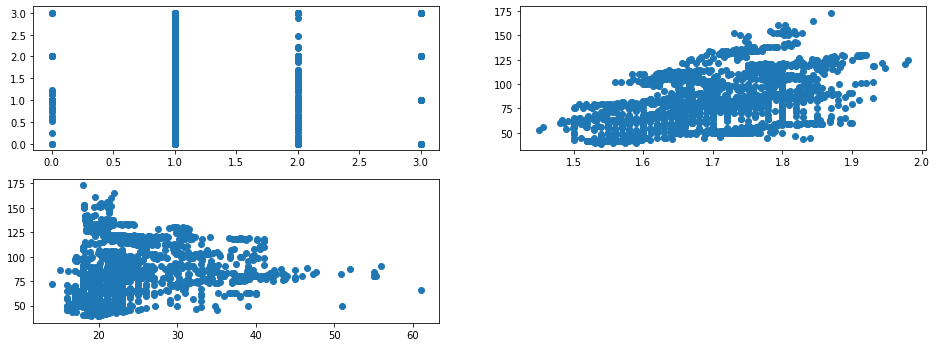

In [25]:

plt.figure(figsize=(16,9))

##----------------------------------------start 
#plt.subplot(3,2,1)
plt.subplot(321)
#********************************************Line Plot
days = np.array(df['CAEC'])
delhi_tem =np.array(df['FAF'])

plt.scatter(days, delhi_tem)

plt.subplot(322)

days = np.array(df['Height'])
delhi_tem =np.array(df['Weight'])

plt.scatter(days, delhi_tem)
plt.subplot(323)

days = np.array(df['Age'])
delhi_tem =np.array(df['Weight'])

plt.scatter(days, delhi_tem)
plt.show()

In [26]:
df2=pd.get_dummies(df)
df2.head()

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,...,FAVC_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,1,2.0,0.0,1.0,0,...,0,1,0,1,0,0,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,1,3.0,3.0,0.0,1,...,0,0,1,0,1,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,1,2.0,2.0,1.0,2,...,0,1,0,1,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,1,2.0,2.0,0.0,2,...,0,1,0,1,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,1,2.0,0.0,0.0,1,...,0,1,0,1,0,0,0,0,1,0


In [27]:
df2.shape

(2111, 26)

In [28]:
df2.keys()

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE',
       'CALC', 'NObeyesdad', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'SMOKE_no',
       'SMOKE_yes', 'SCC_no', 'SCC_yes', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

# Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
, matthews_corrcoef, accuracy_score
from sklearn.model_selection import cross_val_score

In [30]:
X=df2.drop('NObeyesdad',axis=1)
y=df2['NObeyesdad']
print('Shape of X=',X.shape)
print('Shape of y=',y.shape)

Shape of X= (2111, 25)
Shape of y= (2111,)


In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)
print('Shape of X_train=',X_train.shape)
print('Shape of y_train=',y_train.shape)
print('Shape of X_test=',X_test.shape)
print('Shape of y_test=',y_test.shape)

Shape of X_train= (1688, 25)
Shape of y_train= (1688,)
Shape of X_test= (423, 25)
Shape of y_test= (423,)


(25.5, 0.5)

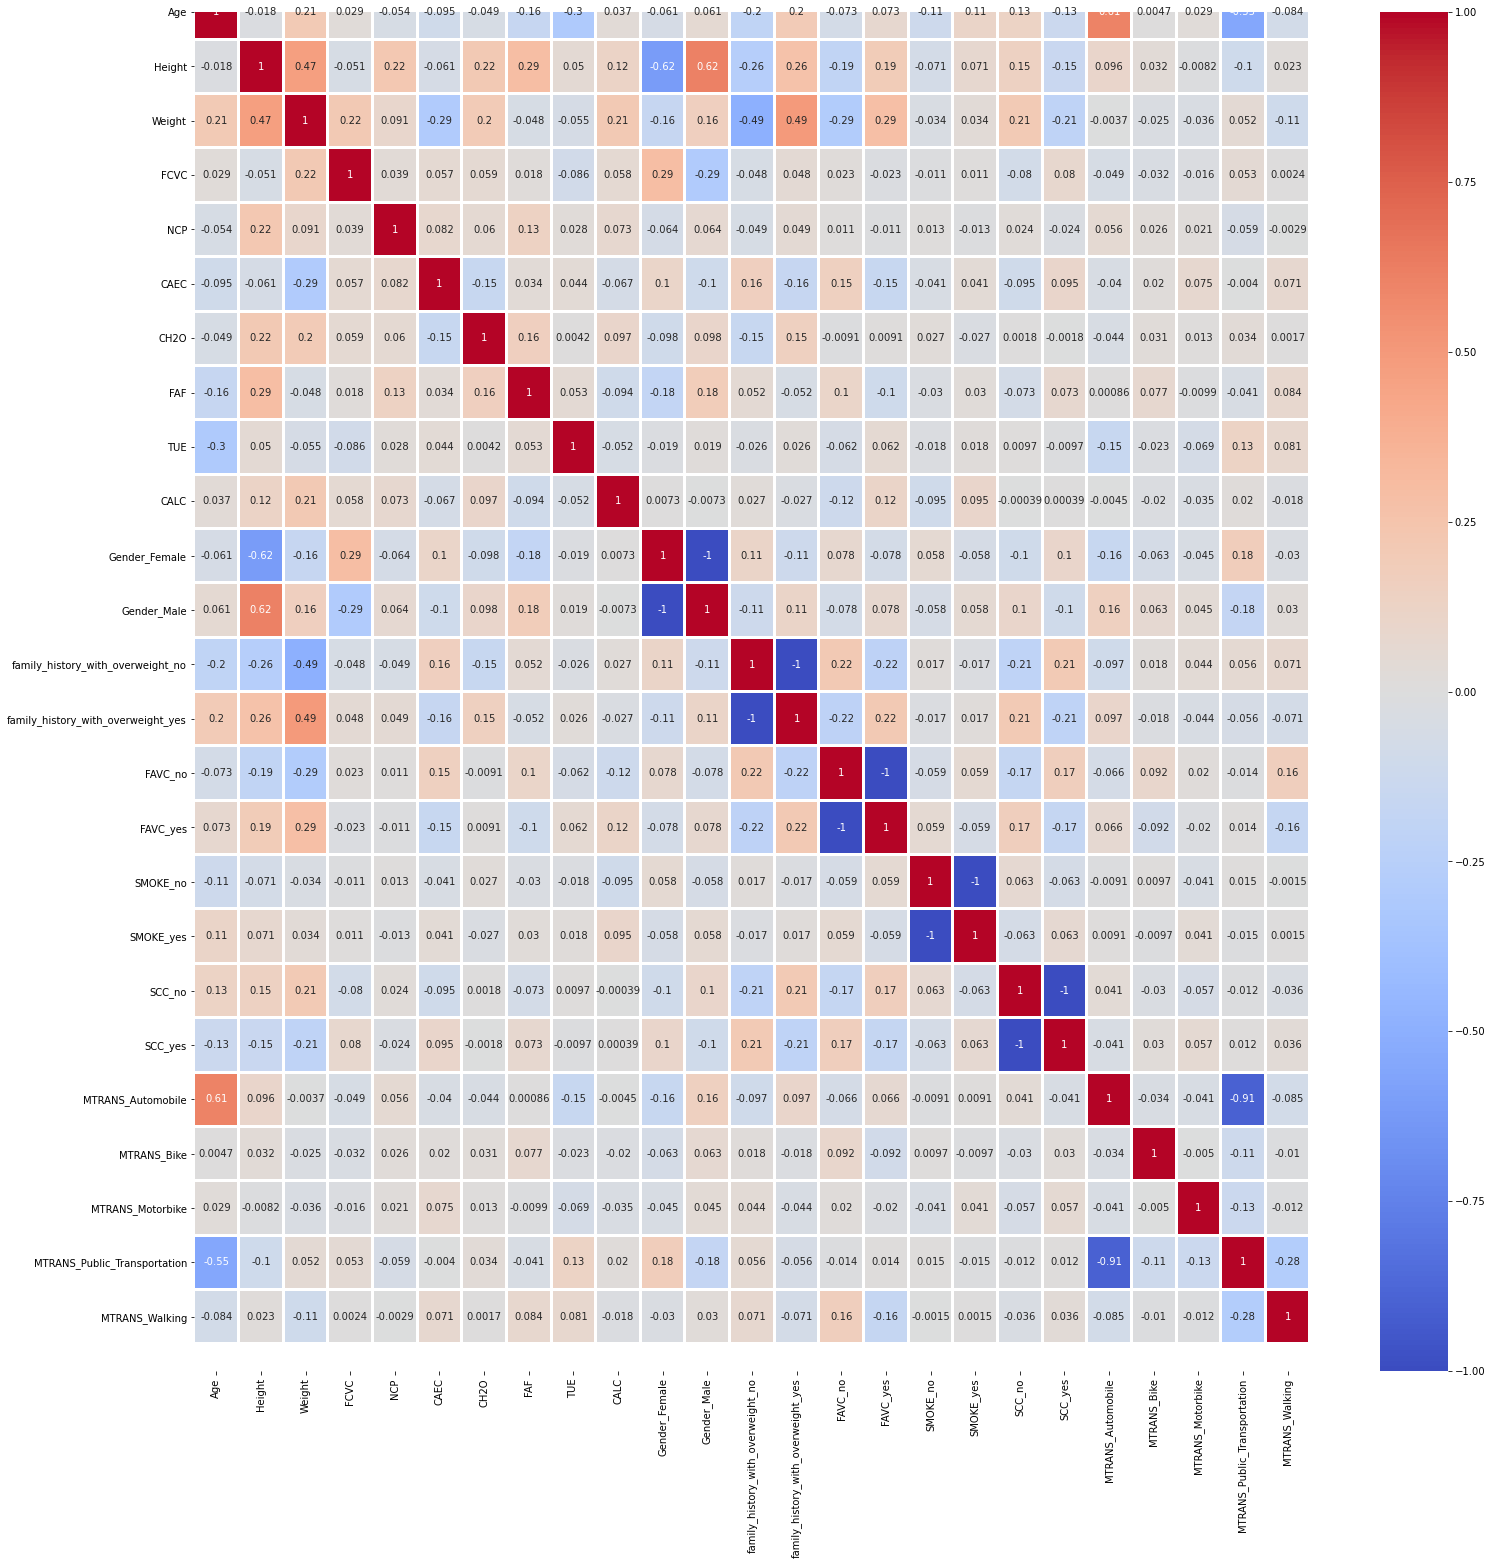

In [32]:
plt.figure(figsize=(25,25))
ax=sns.heatmap(X_train.corr(),cmap='coolwarm',annot=True,linewidth=2)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top=0.5)

In [33]:
X_train

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,...,FAVC_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
900,21.000000,1.618148,68.981403,1.142468,3.000000,0,2.197732,0.827506,0.572877,1,...,1,1,0,1,0,0,0,0,1,0
193,20.000000,1.780000,68.000000,2.000000,1.000000,2,3.000000,2.000000,1.000000,0,...,0,1,0,0,1,0,0,0,1,0
645,21.125098,1.767479,56.265959,2.371338,3.998766,2,2.263466,2.000000,0.844004,0,...,1,1,0,1,0,0,0,0,1,0
2034,26.000000,1.641849,111.682693,3.000000,3.000000,1,2.632253,0.000000,0.244205,1,...,1,1,0,1,0,0,0,0,1,0
1930,25.982113,1.627818,105.428628,3.000000,3.000000,1,1.480750,0.098043,0.663492,1,...,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,23.000000,1.742500,105.028665,2.393837,3.000000,1,2.014990,0.978815,0.413220,1,...,1,1,0,1,0,0,0,0,1,0
1733,30.577944,1.783953,120.613561,2.341999,3.000000,1,2.299878,0.565242,0.921991,1,...,1,1,0,1,0,1,0,0,0,0
1760,31.490699,1.773521,120.209711,2.777165,3.000000,1,2.106861,0.925941,0.291600,1,...,1,1,0,1,0,1,0,0,0,0
485,21.000000,1.800000,73.000000,1.000000,3.000000,3,2.000000,3.000000,1.000000,1,...,1,1,0,1,0,0,0,0,1,0


In [34]:
sc=StandardScaler()
sc.fit_transform(X_train)

array([[-0.52110168, -0.89626904, -0.67425398, ..., -0.07719764,
         0.58282291, -0.16167813],
       [-0.68117566,  0.83589705, -0.71150522, ..., -0.07719764,
         0.58282291, -0.16167813],
       [-0.50107675,  0.7018953 , -1.15689576, ..., -0.07719764,
         0.58282291, -0.16167813],
       ...,
       [ 1.15818619,  0.76655775,  1.27022562, ..., -0.07719764,
        -1.71578706, -0.16167813],
       [-0.52110168,  1.04994026, -0.52171957, ..., -0.07719764,
         0.58282291, -0.16167813],
       [-0.47532613,  0.26782637,  1.6925395 , ..., -0.07719764,
         0.58282291, -0.16167813]])

In [35]:
sc=StandardScaler()
sc.fit(X_train)

StandardScaler()

In [36]:
X_train


,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,...,FAVC_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
900,21.000000,1.618148,68.981403,1.142468,3.000000,0,2.197732,0.827506,0.572877,1,...,1,1,0,1,0,0,0,0,1,0
193,20.000000,1.780000,68.000000,2.000000,1.000000,2,3.000000,2.000000,1.000000,0,...,0,1,0,0,1,0,0,0,1,0
645,21.125098,1.767479,56.265959,2.371338,3.998766,2,2.263466,2.000000,0.844004,0,...,1,1,0,1,0,0,0,0,1,0
2034,26.000000,1.641849,111.682693,3.000000,3.000000,1,2.632253,0.000000,0.244205,1,...,1,1,0,1,0,0,0,0,1,0
1930,25.982113,1.627818,105.428628,3.000000,3.000000,1,1.480750,0.098043,0.663492,1,...,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,23.000000,1.742500,105.028665,2.393837,3.000000,1,2.014990,0.978815,0.413220,1,...,1,1,0,1,0,0,0,0,1,0
1733,30.577944,1.783953,120.613561,2.341999,3.000000,1,2.299878,0.565242,0.921991,1,...,1,1,0,1,0,1,0,0,0,0
1760,31.490699,1.773521,120.209711,2.777165,3.000000,1,2.106861,0.925941,0.291600,1,...,1,1,0,1,0,1,0,0,0,0
485,21.000000,1.800000,73.000000,1.000000,3.000000,3,2.000000,3.000000,1.000000,1,...,1,1,0,1,0,0,0,0,1,0


In [37]:
sc.mean_

array([2.42553804e+01, 1.70189455e+00, 8.67449685e+01, 2.41077039e+00,
       2.69087578e+00, 1.14158768e+00, 1.99786887e+00, 1.00692855e+00,
       6.48405277e-01, 7.29857820e-01, 4.89336493e-01, 5.10663507e-01,
       1.79502370e-01, 8.20497630e-01, 1.16113744e-01, 8.83886256e-01,
       9.78080569e-01, 2.19194313e-02, 9.53791469e-01, 4.62085308e-02,
       2.18009479e-01, 4.14691943e-03, 5.92417062e-03, 7.46445498e-01,
       2.54739336e-02])

In [38]:
sc.scale_


array([ 6.24711175,  0.09343908, 26.34551068,  0.53270434,  0.77343949,
        0.47269053,  0.6050792 ,  0.83538874,  0.60976148,  0.51102488,
        0.49988628,  0.49988628,  0.38377242,  0.38377242,  0.32036127,
        0.32036127,  0.14642052,  0.14642052,  0.20993642,  0.20993642,
        0.41289387,  0.06426292,  0.07674031,  0.43504553,  0.15755955])

In [39]:
X_train.describe()


,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,...,FAVC_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
count,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,...,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000
mean,24.255380,1.701895,86.744968,2.410770,2.690876,1.141588,1.997869,1.006929,0.648405,0.729858,...,0.883886,0.978081,0.021919,0.953791,0.046209,0.218009,0.004147,0.005924,0.746445,0.025474
std,6.248963,0.093467,26.353318,0.532862,0.773669,0.472831,0.605259,0.835636,0.609942,0.511176,...,0.320456,0.146464,0.146464,0.209999,0.209999,0.413016,0.064282,0.076763,0.435174,0.157606
min,15.000000,1.450000,39.371523,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.993462,1.629479,65.055178,2.000000,2.669252,1.000000,1.591554,0.132315,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.815036,1.701405,83.000000,2.341566,3.000000,1.000000,2.000000,1.000000,0.605497,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,26.000000,1.769950,108.744379,3.000000,3.000000,1.000000,2.435682,1.656291,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,56.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

In [41]:
X_train_sc

array([[-0.52110168, -0.89626904, -0.67425398, ..., -0.07719764,
         0.58282291, -0.16167813],
       [-0.68117566,  0.83589705, -0.71150522, ..., -0.07719764,
         0.58282291, -0.16167813],
       [-0.50107675,  0.7018953 , -1.15689576, ..., -0.07719764,
         0.58282291, -0.16167813],
       ...,
       [ 1.15818619,  0.76655775,  1.27022562, ..., -0.07719764,
        -1.71578706, -0.16167813],
       [-0.52110168,  1.04994026, -0.52171957, ..., -0.07719764,
         0.58282291, -0.16167813],
       [-0.47532613,  0.26782637,  1.6925395 , ..., -0.07719764,
         0.58282291, -0.16167813]])

In [42]:
X_train_sc=pd.DataFrame(X_train_sc,columns=['Age', 'Height', 'Weight',
'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE',
'CALC', 'Gender_Female', 'Gender_Male',
'family_history_with_overweight_no',
'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'SMOKE_no',
'SMOKE_yes', 'SCC_no', 'SCC_yes', 'MTRANS_Automobile', 'MTRANS_Bike',
'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'])


In [43]:
X_test_sc=pd.DataFrame(X_test_sc,columns=['Age', 'Height', 'Weight', 'FCVC'
, 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE',
'CALC', 'Gender_Female', 'Gender_Male',
'family_history_with_overweight_no',
'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'SMOKE_no',
'SMOKE_yes', 'SCC_no', 'SCC_yes', 'MTRANS_Automobile', 'MTRANS_Bike',
'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'])


In [44]:
X_train_sc.head()

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,...,FAVC_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-0.521102,-0.896269,-0.674254,-2.380875,0.399675,-2.415085,0.330309,-0.214777,-0.123865,0.528628,...,0.362446,0.149702,-0.149702,0.220107,-0.220107,-0.528004,-0.064531,-0.077198,0.582823,-0.161678
1,-0.681176,0.835897,-0.711505,-0.771104,-2.186177,1.816013,1.656198,1.188754,0.576610,-1.428224,...,-2.759030,0.149702,-0.149702,-4.543240,4.543240,-0.528004,-0.064531,-0.077198,0.582823,-0.161678
2,-0.501077,0.701895,-1.156896,-0.074023,1.691005,1.816013,0.438946,1.188754,0.320779,-1.428224,...,0.362446,0.149702,-0.149702,0.220107,-0.220107,-0.528004,-0.064531,-0.077198,0.582823,-0.161678
3,0.279268,-0.642617,0.946564,1.106110,0.399675,-0.299536,1.048432,-1.205341,-0.662883,0.528628,...,0.362446,0.149702,-0.149702,0.220107,-0.220107,-0.528004,-0.064531,-0.077198,0.582823,-0.161678
4,0.276405,-0.792779,0.709178,1.106110,0.399675,-0.299536,-0.854630,-1.087979,0.024742,0.528628,...,0.362446,0.149702,-0.149702,0.220107,-0.220107,-0.528004,-0.064531,-0.077198,0.582823,-0.161678


# Train Support Vector Classification Model

In [45]:
from sklearn.svm import SVC

In [46]:
classification_rbf=SVC(kernel='rbf')
classification_rbf.fit(X_train,y_train)

SVC()

In [47]:
classification_rbf.score(X_test,y_test)

0.5366430260047281

# SVC with kernel Polynomial

In [48]:
classification_poly=SVC(kernel='poly',degree=2)
classification_poly.fit(X_train,y_train)
classification_poly.score(X_test,y_test)


0.6335697399527187

# SVC with Kernel Linear

In [49]:
classification_linear=SVC(kernel='linear')
classification_linear.fit(X_train,y_train)
classification_linear.score(X_test,y_test)

0.8936170212765957

In [50]:
predicts = classification_poly.predict(X_test)
print("")
print('Classification report of Support Vector Machines Results:')
print("")
print(classification_report(y_test,predicts))
cm1=confusion_matrix(y_test,predicts)
print('Confusion Matrix result of support vector machines is:\n', cm1)
print("")




Classification report of Support Vector Machines Results:

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        55
           1       0.60      0.54      0.57        59
           2       0.53      0.55      0.54        55
           3       0.38      0.54      0.45        61
           4       0.58      0.41      0.48        78
           5       0.81      0.61      0.70        49
           6       0.83      0.95      0.89        66

    accuracy                           0.63       423
   macro avg       0.65      0.64      0.64       423
weighted avg       0.65      0.63      0.63       423

Confusion Matrix result of support vector machines is:
 [[48  7  0  0  0  0  0]
 [10 32 13  4  0  0  0]
 [ 0  9 30 15  1  0  0]
 [ 0  5 13 33 10  0  0]
 [ 0  0  1 35 32  7  3]
 [ 0  0  0  0  9 30 10]
 [ 0  0  0  0  3  0 63]]



# Train Decision Tree Classification Model


In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
classifier=DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train,y_train)


DecisionTreeClassifier()

In [53]:
 classifier.score(X_test,y_test)

0.933806146572104

In [54]:
classifier_entropy=DecisionTreeClassifier(criterion='entropy')
classifier_entropy.fit(X_train,y_train)
classifier_entropy.score(X_test,y_test)

0.9527186761229315

In [55]:
predicts = classifier_entropy.predict(X_test)
print("")
print('Classification report of Decision Tree Classification Results:')
print("")
print(classification_report(y_test,predicts))
cm1=confusion_matrix(y_test,predicts)
print('Confusion Matrix result of Decision Tree Classification is:\n', cm1)
print("")


Classification report of Decision Tree Classification Results:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.90      0.88      0.89        59
           2       0.84      0.89      0.87        55
           3       0.98      0.95      0.97        61
           4       0.97      0.99      0.98        78
           5       0.98      0.98      0.98        49
           6       1.00      0.98      0.99        66

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423

Confusion Matrix result of Decision Tree Classification is:
 [[54  1  0  0  0  0  0]
 [ 1 52  6  0  0  0  0]
 [ 0  5 49  1  0  0  0]
 [ 0  0  3 58  0  0  0]
 [ 0  0  0  0 77  1  0]
 [ 0  0  0  0  1 48  0]
 [ 0  0  0  0  1  0 65]]



# Train Random Forest Classification Model


In [56]:
from sklearn.ensemble import RandomForestClassifier


In [57]:
 RFClassifier=RandomForestClassifier(n_estimators=5)
RFClassifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [58]:
RFClassifier.score(X_test,y_test)

0.9125295508274232

In [59]:
predicts = RFClassifier.predict(X_test)
print("")
print('Classification report of Random Forest Classification Results:')
print("")
print(classification_report(y_test,predicts))
cm1=confusion_matrix(y_test,predicts)
print('Confusion Matrix result of Random Forest Classification is:\n', cm1)
print("")


Classification report of Random Forest Classification Results:

              precision    recall  f1-score   support

           0       0.91      0.96      0.94        55
           1       0.79      0.83      0.81        59
           2       0.88      0.80      0.84        55
           3       0.86      0.90      0.88        61
           4       0.96      0.91      0.93        78
           5       0.98      1.00      0.99        49
           6       1.00      0.98      0.99        66

    accuracy                           0.91       423
   macro avg       0.91      0.91      0.91       423
weighted avg       0.91      0.91      0.91       423

Confusion Matrix result of Random Forest Classification is:
 [[53  1  0  1  0  0  0]
 [ 5 49  4  1  0  0  0]
 [ 0  7 44  3  1  0  0]
 [ 0  3  2 55  1  0  0]
 [ 0  2  0  4 71  1  0]
 [ 0  0  0  0  0 49  0]
 [ 0  0  0  0  1  0 65]]



# Train K Nearest neighbour Classification Model

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
KNClassifier=KNeighborsClassifier(n_neighbors=5)
KNClassifier.fit(X_train,y_train)

KNeighborsClassifier()

In [62]:
KNClassifier.score(X_test,y_test)

0.8770685579196218

In [63]:
predicts = KNClassifier.predict(X_test)
print("")
print('Classification report of K Nearest neighbour Classification Results:')
print("")
print(classification_report(y_test,predicts))
accuracy = cross_val_score(KNClassifier,X,y,cv=50)
cm1=confusion_matrix(y_test,predicts)
print('Confusion Matrix result of K Nearest neighbour Classification is:\n', cm1)
print("")


Classification report of K Nearest neighbour Classification Results:

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        55
           1       0.94      0.54      0.69        59
           2       0.71      0.87      0.78        55
           3       0.82      0.87      0.84        61
           4       0.95      0.91      0.93        78
           5       0.92      0.96      0.94        49
           6       0.96      0.98      0.97        66

    accuracy                           0.88       423
   macro avg       0.88      0.88      0.87       423
weighted avg       0.89      0.88      0.87       423

Confusion Matrix result of K Nearest neighbour Classification is:
 [[55  0  0  0  0  0  0]
 [ 7 32 17  3  0  0  0]
 [ 0  1 48  6  0  0  0]
 [ 0  1  3 53  4  0  0]
 [ 0  0  0  3 71  3  1]
 [ 0  0  0  0  0 47  2]
 [ 0  0  0  0  0  1 65]]



# Train Naive Bayes Classifier Model

In [64]:
from sklearn.naive_bayes import GaussianNB

In [65]:
GNB=GaussianNB()
GNB.fit(X_train,y_train)

GaussianNB()

In [66]:
GNB.score(X_test,y_test)

0.5602836879432624

In [67]:
from sklearn.naive_bayes import BernoulliNB

In [68]:
BNB=BernoulliNB()
BNB.fit(X_train,y_train)

BernoulliNB()

In [69]:
BNB.score(X_train,y_train)

0.4994075829383886

In [70]:
from sklearn.naive_bayes import MultinomialNB

In [71]:
MNB=MultinomialNB()
MNB.fit(X_train,y_train)


MultinomialNB()

In [72]:
MNB.score(X_train,y_train)


0.5930094786729858

In [73]:
predicts = MNB.predict(X_test)
print("")
print('Classification report of Naive Bayes Classifier Results:')
print("")
print(classification_report(y_test,predicts))
cm1=confusion_matrix(y_test,predicts)
print('Confusion Matrix result of Naive Bayes Classifier is:\n', cm1)
print("")


Classification report of Naive Bayes Classifier Results:

              precision    recall  f1-score   support

           0       0.76      0.82      0.79        55
           1       0.57      0.44      0.50        59
           2       0.44      0.33      0.37        55
           3       0.41      0.46      0.43        61
           4       0.50      0.29      0.37        78
           5       0.56      0.98      0.72        49
           6       0.83      0.97      0.90        66

    accuracy                           0.60       423
   macro avg       0.58      0.61      0.58       423
weighted avg       0.58      0.60      0.57       423

Confusion Matrix result of Naive Bayes Classifier is:
 [[45  2  7  1  0  0  0]
 [13 26 12  8  0  0  0]
 [ 1  9 18 13  8  4  2]
 [ 0  9  2 28 14  8  0]
 [ 0  0  2 18 23 24 11]
 [ 0  0  0  1  0 48  0]
 [ 0  0  0  0  1  1 64]]



# SVC With kernel linear

In [74]:
classification_linear=SVC(kernel='linear')
classification_linear.fit(X_train,y_train)
SVC_acc = classification_linear.score(X_test,y_test)
print("SVC:", 100*round(SVC_acc, 4), '%')

SVC: 89.36 %


# Train Decision Tree Classification Model


In [75]:
classifier_entropy=DecisionTreeClassifier(criterion='entropy')
classifier_entropy.fit(X_train,y_train)
print("Decision Tree:",classifier_entropy.score(X_test,y_test)*100,'%')

Decision Tree: 95.27186761229315 %


In [76]:
print("Random Forest:",RFClassifier.score(X_test,y_test)*100,'%')

Random Forest: 91.25295508274232 %


In [77]:
print("KNN:",KNClassifier.score(X_test,y_test)*100,'%')

KNN: 87.70685579196218 %


In [78]:
print("Naive Bayes:",MNB.score(X_train,y_train)*100,'%')

Naive Bayes: 59.30094786729858 %


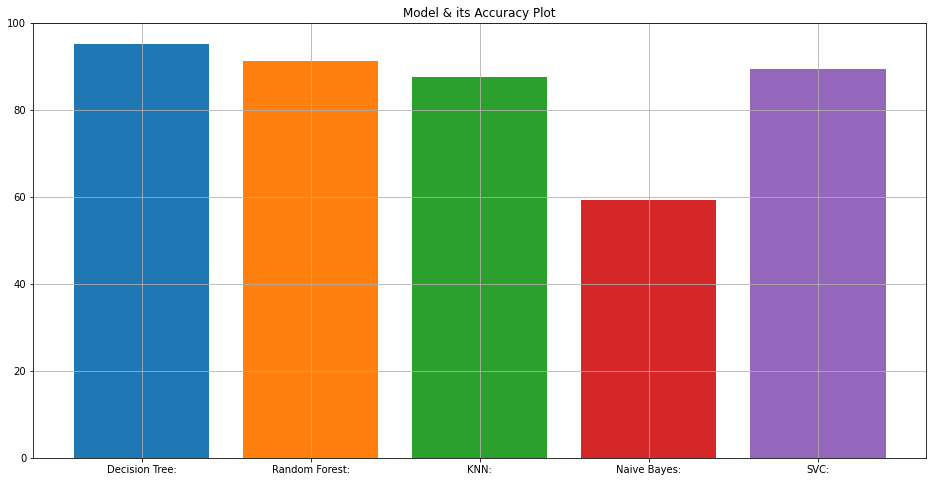

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.title('Model & its Accuracy Plot')
plt.bar("Decision Tree:",classifier_entropy.score(X_test,y_test)*100)
plt.bar("Random Forest:",RFClassifier.score(X_test,y_test)*100)
plt.bar("KNN:",KNClassifier.score(X_test,y_test)*100)
plt.bar("Naive Bayes:",MNB.score(X_train,y_train)*100)
plt.bar("SVC:", classification_linear.score(X_test,y_test)*100)

plt.grid()
plt.show()